In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\abhin\machine learning\term 1 project\ablone\abalone_train.csv")
df

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,3141,I,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5
1,3521,I,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3
2,883,M,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15
3,3627,M,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10
4,2106,M,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14
...,...,...,...,...,...,...,...,...,...,...
3336,1033,M,0.650,0.525,0.185,1.6220,0.6645,0.3225,0.4770,10
3337,3264,F,0.655,0.500,0.140,1.1705,0.5405,0.3175,0.2850,12
3338,1653,M,0.595,0.450,0.145,0.9590,0.4630,0.2065,0.2535,10
3339,2607,F,0.625,0.490,0.165,1.1270,0.4770,0.2365,0.3185,9


In [3]:
df['Sex'].unique()

array(['I', 'M', 'F'], dtype=object)

In [522]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)b

In [523]:
df

,Id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_I,Sex_M
0,3141,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5,1,0
1,3521,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3,1,0
2,883,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15,0,1
3,3627,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10,0,1
4,2106,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3336,1033,0.650,0.525,0.185,1.6220,0.6645,0.3225,0.4770,10,0,1
3337,3264,0.655,0.500,0.140,1.1705,0.5405,0.3175,0.2850,12,0,0
3338,1653,0.595,0.450,0.145,0.9590,0.4630,0.2065,0.2535,10,0,1
3339,2607,0.625,0.490,0.165,1.1270,0.4770,0.2365,0.3185,9,0,0


In [524]:
df.isna().sum().sort_values()

Id                0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
Sex_I             0
Sex_M             0
dtype: int64

In [527]:
df.drop('Id',axis=1 , inplace=True)

KeyError: "['Id'] not found in axis"

<AxesSubplot:>

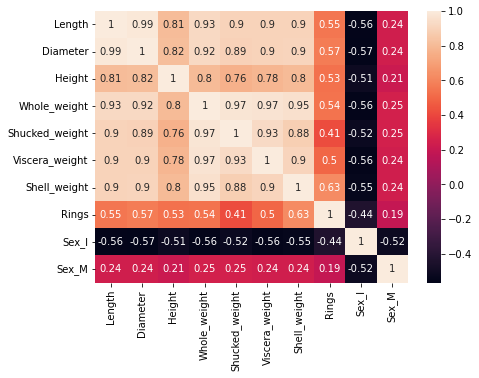

In [528]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True)

In [529]:
df1=df.loc[: , ['Height','Length','Sex_I','Sex_M','Rings']]
df1

,Height,Length,Sex_I,Sex_M,Rings
0,0.080,0.180,1,0,5
1,0.055,0.215,1,0,3
2,0.170,0.660,0,1,15
3,0.200,0.715,0,1,10
4,0.155,0.595,0,1,14
...,...,...,...,...,...
3336,0.185,0.650,0,1,10
3337,0.140,0.655,0,0,12
3338,0.145,0.595,0,1,10
3339,0.165,0.625,0,0,9


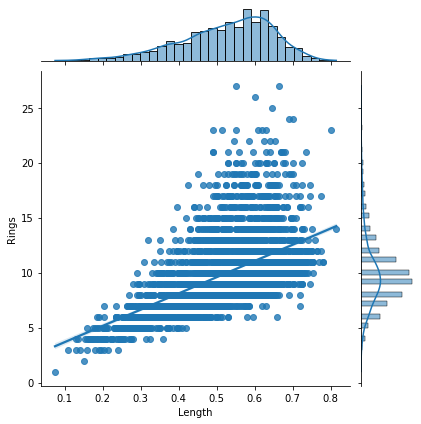

In [530]:
sns.jointplot("Length", "Rings", data=df, kind='reg')
plt.show()

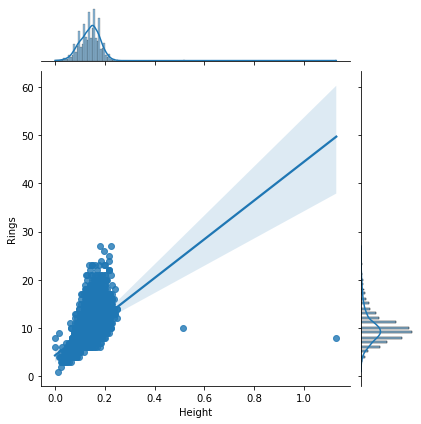

In [10]:
sns.jointplot("Height", "Rings", data=df, kind='reg')
plt.show()

In [531]:
feature_cols = ['Height','Length','Sex_I','Sex_M']
X = df[feature_cols]
X.head()

,Height,Length,Sex_I,Sex_M
0,0.080,0.180,1,0
1,0.055,0.215,1,0
2,0.170,0.660,0,1
3,0.200,0.715,0,1
4,0.155,0.595,0,1


In [532]:
y = df.Rings
y.head()

0     5
1     3
2    15
3    10
4    14
Name: Rings, dtype: int64

In [533]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=90)

In [534]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (3006, 4)
y_train shape:  (3006,)

Test cases as below
X_test shape:  (335, 4)
y_test shape:  (335,)


In [535]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train[feature_cols]  = sc.fit_transform(X_train[feature_cols])
X_test[feature_cols] = sc.transform(X_test[feature_cols]) 

In [536]:
X_train.head()

,Height,Length,Sex_I,Sex_M
2124,0.061947,0.358108,1.0,0.0
347,0.154867,0.831081,0.0,1.0
168,0.146018,0.763514,0.0,1.0
2551,0.066372,0.270270,1.0,0.0
602,0.163717,0.797297,0.0,0.0


In [537]:
X_train.describe()

,Height,Length,Sex_I,Sex_M
count,3006.000000,3006.000000,3006.000000,3006.000000
mean,0.123808,0.608418,0.315369,0.367931
std,0.037787,0.162474,0.464740,0.482323
min,0.000000,0.000000,0.000000,0.000000
25%,0.101770,0.506757,0.000000,0.000000
50%,0.128319,0.635135,0.000000,0.000000
75%,0.146018,0.729730,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [540]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train) 

LinearRegression()

In [541]:
lr


LinearRegression()

In [542]:
print('Intercept:',lr.intercept_)    
print('Coefficients:',lr.coef_) 

Intercept: 4.6199798616496945
Coefficients: [18.29931801  5.72634795 -1.18391738 -0.05486228]


In [543]:
y_pred_train = lr.predict(X_train)  

In [544]:
y_pred_test = lr.predict(X_test)                                                           

In [545]:
list(zip(y_test,y_pred_test))

[(12, 12.286800209787451),
 (11, 11.745118647292516),
 (9, 11.211608472289814),
 (7, 6.546504459064321),
 (10, 7.995853937657728),
 (8, 10.67174823580159),
 (11, 13.119025347532592),
 (6, 7.4471719431678665),
 (11, 12.448741077170105),
 (15, 12.367770643478778),
 (8, 8.82631304807467),
 (9, 12.293974916457266),
 (20, 11.667735566936097),
 (10, 12.003376042528549),
 (18, 12.591693198377293),
 (12, 10.918246890210481),
 (8, 11.288991552646234),
 (13, 9.846642506047754),
 (4, 5.8743988626951245),
 (8, 8.875940922932497),
 (6, 6.697683266442251),
 (4, 6.77489207212378),
 (9, 10.859797257351019),
 (10, 11.780222834135817),
 (9, 9.329477345066286),
 (15, 11.368965305515147),
 (10, 12.351599904132435),
 (9, 11.710014460449216),
 (9, 10.7824141769946),
 (11, 8.745516889058234),
 (4, 5.9093287748635355),
 (4, 6.117310163769107),
 (15, 10.909250857533955),
 (11, 11.192675024792857),
 (6, 7.014390294537744),
 (11, 10.167111162153045),
 (14, 12.014138102533273),
 (9, 10.666339556459972),
 (10, 11.

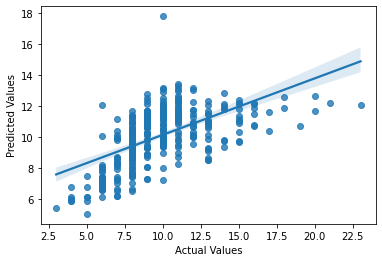

In [546]:
sns.regplot(y_test,y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [547]:
from sklearn.metrics import mean_absolute_error, mean_squared_error ,r2_score

In [548]:
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

In [549]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 6.823690457170386
MSE for test set is 5.842822550222723


In [550]:
RMSE_train = np.sqrt( mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

In [551]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 2.6122194504234106
RMSE for test set is 2.417193113969739


In [552]:
print(r2_score(y_train,y_pred_train))
print(r2_score(y_test,y_pred_test)) 

0.34642386288254345
0.3314163293057071


In [512]:
r2_train = r2_score(y_train,y_pred_train)
r2_train

0.32783416123477527

In [513]:
n = X_train.shape[0]
n

3006

In [514]:
p = X_train.shape[1]
p

2

In [515]:
num = (1-r2_train)*(n-1)
den = n-p-1
ar2_train = 1-(num/den)
ar2_train

0.32738649833849476

In [516]:
df_test = pd.read_csv(r"C:\Users\abhin\machine learning\term 1 project\ablone\abalone_test.csv")
df_test

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,668,M,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350
1,1580,I,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935
2,3784,M,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175
3,463,I,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200
4,2615,M,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775
...,...,...,...,...,...,...,...,...,...
831,575,F,0.610,0.475,0.140,1.1330,0.5275,0.2355,0.3500
832,3231,M,0.410,0.325,0.120,0.3745,0.1580,0.0810,0.1250
833,1084,I,0.445,0.345,0.105,0.4090,0.1675,0.1015,0.1170
834,290,M,0.540,0.435,0.180,0.9960,0.3835,0.2260,0.3250


In [555]:
df_test = pd.get_dummies(df_test, columns=['Sex'], drop_first=True)

In [556]:
df_test.head()

,Id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
0,668,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350,0,1
1,1580,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935,1,0
2,3784,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175,0,1
3,463,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200,1,0
4,2615,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775,0,1


In [558]:
df_test.drop('Id',axis=1 , inplace=True)

In [561]:
df_test2=df_test.loc[: , ['Height','Length','Sex_I','Sex_M']]
df_test2

,Height,Length,Sex_I,Sex_M
0,0.155,0.550,0,1
1,0.120,0.500,1,0
2,0.155,0.620,0,1
3,0.055,0.220,1,0
4,0.175,0.645,0,1
...,...,...,...,...
831,0.140,0.610,0,0
832,0.120,0.410,0,1
833,0.105,0.445,1,0
834,0.180,0.540,0,1


In [4]:
f=lr.predict(df_test2)

NameError: name 'lr' is not defined

In [563]:
df_test3 = pd.read_csv(r"C:\Users\abhin\machine learning\term 1 project\ablone\abalone_test.csv")
df_test3

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,668,M,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350
1,1580,I,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935
2,3784,M,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175
3,463,I,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200
4,2615,M,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775
...,...,...,...,...,...,...,...,...,...
831,575,F,0.610,0.475,0.140,1.1330,0.5275,0.2355,0.3500
832,3231,M,0.410,0.325,0.120,0.3745,0.1580,0.0810,0.1250
833,1084,I,0.445,0.345,0.105,0.4090,0.1675,0.1015,0.1170
834,290,M,0.540,0.435,0.180,0.9960,0.3835,0.2260,0.3250


In [564]:
df_test3=df_test3['Id']

In [565]:
df_test3

0       668
1      1580
2      3784
3       463
4      2615
       ... 
831     575
832    3231
833    1084
834     290
835    2713
Name: Id, Length: 836, dtype: int64

In [575]:
f=(list(zip(df_test3,f)))

In [6]:
df5 = pd.DataFrame(f)


NameError: name 'f' is not defined

In [578]:
df5

,0,1
0,668,10.551003
1,1580,8.495155
2,3784,10.951848
3,463,5.702322
4,2615,11.460993
...,...,...
831,575,10.674957
832,3231,9.108838
833,1084,7.905716
834,290,10.951223


In [580]:
df5.to_csv('submission.csv', index=False, header=False)